In [59]:
import pandas as pd 

import psana as ps
import numpy as np
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as npply
import sys
import os
import h5py
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter as gf
from sklearn.utils import resample
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/TestCode/EarlyScience/AnalyzeH5/')
from chemRIXSAnalysis import *
from ChemRIXSClasses import *
from filterTools import *
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/')
from Functions import *
from Load_Scans import *
from raw_data_class import RawData as RDC
from pro_data_class import ProData as PDC
from raw_class_2 import RawData_2 as RDC_2
%matplotlib notebook


font = {'size'   : 16}
mpl.rc('font', **font)
# %matplotlib widget
cmap = plt.cm.get_cmap('terrain').reversed()

In [60]:
exp = 'rixlv1519'
small_data_folder = '/reg/data/ana01/rix/%s/hdf5/smalldata/' % exp #changeme
scans = [108]
raw = h5py.File(small_data_folder+'%s_Run%04d.h5' % (exp,scans[0]))
# events = np.array(raw['timestamp'])
# print(list(raw.keys()))
# events

In [74]:
pos = raw_datas[0].tt_pos[2000]
print(raw_datas[0].tt_posps[2000])
a = -0.0013584927458976459
b =  3.1264188429430901e-06
c = -1.1172611228659911e-09
print(c * np.square(pos) + pos * b + a)

-159.09753541194823
-0.00024149466148628814


In [62]:
print((raw['hsd']['full_hsd_1']).shape)

(71231, 118840)


['ampl', 'amplnxt', 'fltpos', 'fltpos_ps', 'fltposfwhm', 'proj_ref', 'proj_sig', 'refampl']


<IPython.core.display.Javascript object>


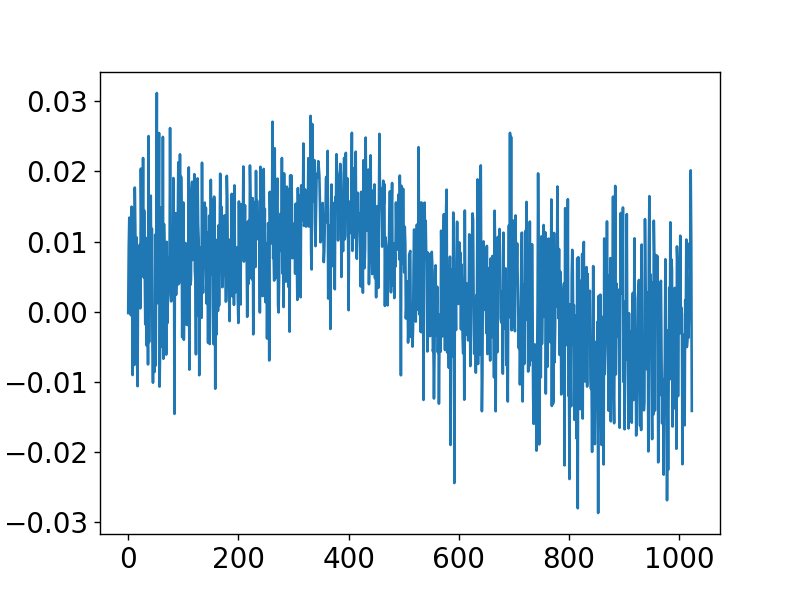

In [38]:
print(list(raw['tt']))

# a = np.zeros(1024)

for i in range (len(a)):
    a[i] = np.sum(raw['tt']['proj_sig'][20000][i])
plt.figure()
plt.plot(a)

In [3]:
# raw_datas = []
# for scan in scans:
#     raw_data = load_scans_2_timestamp(small_data_folder,exp,scan)
    
    
#     I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
#     process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
#     I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
#     process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
    
#     intensities_fim2, I0_specs_fim2, baselines_fim2 = \
#     process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(200,250),np.arange(50,130))
        
#     intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
#     andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
#     process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
#     nan_cond_1 = np.logical_not(np.isnan(andor_dir_intensities))
    
#     nan_cond_2 = np.logical_not(np.isnan(np.squeeze(raw_data.mono_encoder)))
    
#     nan_cond_3 = np.logical_not(np.isnan(raw_data.energy_raw))
   
#     nan_cond_4 = np.logical_not(np.isnan(raw_data.lxt))
    
#     nan_cond_5 = np.logical_not(np.isnan(I0_intensities_fim0[4,:]))&np.logical_not(np.isnan(I0_intensities_fim0[5,:]))&\
#                 np.logical_not(np.isnan(I0_intensities_fim0[6,:]))&np.logical_not(np.isnan(I0_intensities_fim0[7,:]))
    
#     nan_cond_6 = np.logical_not(np.isnan(I0_intensities_fim1[4,:]))&np.logical_not(np.isnan(I0_intensities_fim1[5,:]))&\
#                 np.logical_not(np.isnan(I0_intensities_fim1[6,:]))&np.logical_not(np.isnan(I0_intensities_fim1[7,:]))
    
#     nan_cond_7 = np.logical_not(np.isnan(I0_intensities_fim1[6,:]))&np.logical_not(np.isnan(I0_intensities_fim1[7,:]))
    
#     nan_cond_8 = np.logical_not(np.isnan(raw_data.xgmd))
    
#     nan_cond_9 = np.logical_not(np.isnan(raw_data.gmd))
    
#     nan_cond_10 = np.logical_not(np.isnan(raw_data.laser))
    
    
    
#     nan_cond_11 = np.logical_not(np.isnan(raw_data.tt_pos)&np.isnan(raw_data.tt_posps))
    
#     nan_cond = nan_cond_1&nan_cond_2&nan_cond_3&nan_cond_4&nan_cond_5&nan_cond_6&nan_cond_7&nan_cond_8&\
#             nan_cond_9&nan_cond_10&nan_cond_11
    
    
#     raw_data.energy_raw = raw_data.energy_raw[nan_cond]
#     raw_data.mono_encoder = raw_data.mono_encoder[nan_cond]
#     raw_data.lxt = raw_data.lxt[nan_cond]
#     raw_data.tt_pos = raw_data.tt_pos[nan_cond]
#     raw_data.tt_posps = raw_data.tt_posps[nan_cond]
#     I0_intensities_fim0_new = []
#     I0_intensities_fim1_new = []
#     intensities_fim2_new = []
#     for i in range(0,8):
#         new_0 = I0_intensities_fim0[i][nan_cond]
#         new_1 = I0_intensities_fim1[i][nan_cond]
#         new_2 = intensities_fim2[i][nan_cond]
#         I0_intensities_fim0_new.append(new_0)
#         I0_intensities_fim1_new.append(new_1)
#         intensities_fim2_new.append(new_2)
#     I0_intensities_fim0_new = np.asarray(I0_intensities_fim0_new)
#     I0_intensities_fim1_new = np.asarray(I0_intensities_fim1_new)
#     intensities_fim2_new = np.asarray(intensities_fim2_new)
#     andor_dir_intensities = andor_dir_intensities[nan_cond]
#     raw_data.xgmd = raw_data.xgmd[nan_cond]
#     raw_data.gmd = raw_data.gmd[nan_cond]
#     raw_data.events = raw_data.events[nan_cond]
    
    
    
    
#     raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0_new,
#                         I0_specs_fim0=I0_specs_fim0,
#                         baselines_fim0=baselines_fim0,
#                         I0_intensities_fim1=I0_intensities_fim1_new,
#                         I0_specs_fim1=I0_specs_fim1,
#                         baselines_fim1=baselines_fim1,
#                         intensities_fim2=intensities_fim2_new,
#                         andor_dir_intensities=andor_dir_intensities,
#                         andor_dir_specs=andor_dir_specs,
#                         baseline_andor_dir=baseline_andor_dir,
#                         )
    
    
#     raw_datas = raw_datas + [raw_data]
# print(raw_datas[0].I0_intensities_fim0.shape)

loading TT
loading fim0
loading fim1
loading andor
loading fim2
(8, 21909)


In [61]:
raw_datas = []
for scan in scans:
    raw_data = load_scans(small_data_folder,exp,scan)
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(103,112))
             
    intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
#     if raw_data.laser == 1:
#         r = []
        
#     if raw_data.laser == 0:
#         r = []

    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir
                        )
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

generating mono_encoder_ev
loading TT
loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['events', 'xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'nan_cond', 'mono_encoder_ev', 'tt_pos', 'tt_posps', 'tt_posfwhm', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


In [62]:
raw_datas[0].events.shape

(46565,)

In [4]:
raw_datas = []
for scan in scans:
    raw_data = load_scans_2(small_data_folder,exp,scan)
    
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
    
    intensities_fim2, I0_specs_fim2, baselines_fim2 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(200,250),np.arange(50,130))
        
    intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir
                        )
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'events', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<IPython.core.display.Javascript object>


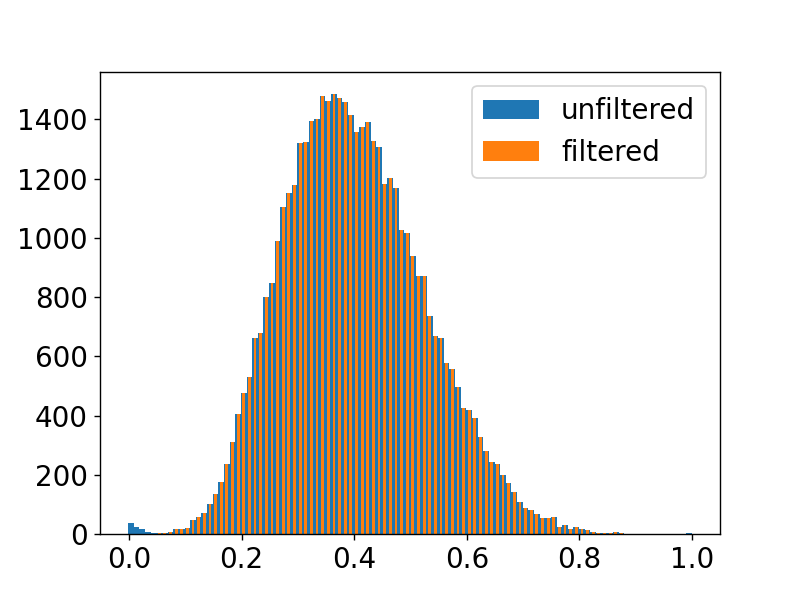

<IPython.core.display.Javascript object>


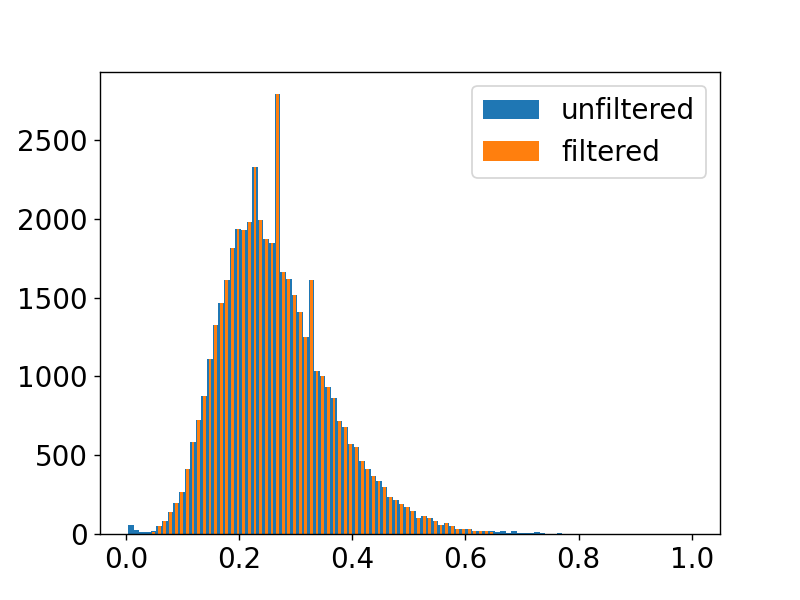

<IPython.core.display.Javascript object>


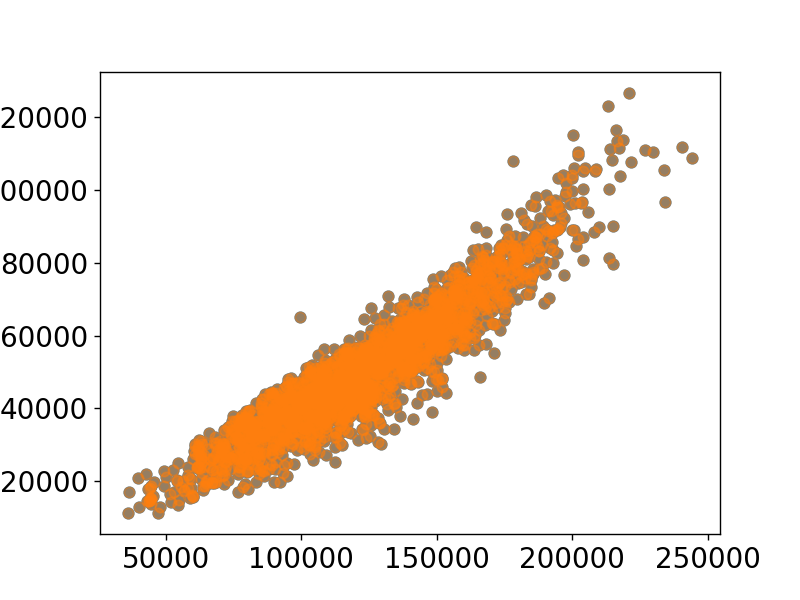

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [63]:
plt.close('all')
scans_to_plot = [0]
n_bins = 100
# plt.figure()
to_average = []
fim0_channels = [4,5,6,7]#,5,6,7]
# fim1_channels = [6,7]
for scan in scans_to_plot:
    all_events = raw_datas[scan].events
    nan_cond = np.logical_not(np.isnan(np.squeeze(raw_datas[scan].mono_encoder)))
    pumped_events = all_events[raw_datas[scan].laser==1]
    unpumped_events = all_events[raw_datas[scan].laser==0]
    
    x_axis = np.squeeze(raw_datas[scan].mono_encoder)[nan_cond]
    andor = raw_datas[scan].andor_dir_intensities[nan_cond]
    
    
    fim_0 = np.sum(raw_datas[scan].I0_intensities_fim0[fim0_channels,:],0)
#     fim_1 = np.sum(raw_datas[scan].I0_intensities_fim1[fim1_channels,:],0)
    
#     all_Izero = fim_0
#     all_Izero = fim_1
    all_Izero = np.sum((np.array((fim_0)),0))
    
#     fim_0 = raw_datas[scan].I0_intensities_fim1[7,:]


    B_condition_1 = bounds_filter(all_Izero/np.max(all_Izero)\
                                  ,[[0.05,'None'],[4]],True) 
    B_condition_2 = bounds_filter(andor/np.max(andor)\
                                  ,[[0.05,'None'],[4]],True) 
    bounds_conditions = B_condition_1 & B_condition_2
    

    x_value = x_axis[bounds_conditions]
    y_value = all_Izero[nan_cond][bounds_conditions]
    bins, Izero_binned_means, Izero_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = andor[nan_cond][bounds_conditions]
    bins, andor_binned_means, andor_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = all_events[nan_cond][bounds_conditions]
    bins, trash, events_binned = energy_binning(x_value,y_value,n_bins)
    
    lin_conditions = []
    plot = False
    for i in range(0,n_bins-1):
            if i is 1:
                plot = True
            lin_conditions.append(lin_filter(Izero_binned_shots[i],\
                               andor_binned_shots[i],[1,True],plot))
            plot = False
    lin_conditions = np.asarray(lin_conditions,dtype=object)

    andor_filt_and_binned = np.asarray([andor_shots[lin_cond] \
                                        for andor_shots,lin_cond in zip(andor_binned_shots,lin_conditions)],dtype=object)
    Izero_filt_and_binned = np.asarray([Izero_shots[lin_cond] \
                                        for Izero_shots,lin_cond in zip(Izero_binned_shots,lin_conditions)],dtype=object)

    
    events_filt_and_binned = np.asarray([events_binned[lin_cond] \
                                        for events_binned,lin_cond in zip(events_binned,lin_conditions)],dtype=object)

    norm_then_mean = np.asarray([np.mean(x) for x in andor_filt_and_binned/Izero_filt_and_binned])
    mean_then_norm = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(andor_filt_and_binned,Izero_filt_and_binned)])
    
    for i in range(0,len(events_filt_and_binned)):
        pumped_condition = [k in pumped_events for k in events_filt_and_binned[i]]
        unpumped_condition = [k in unpumped_events for k in events_filt_and_binned[i]]

        andor_unpumped.append(andor_filt_and_binned[i][unpumped_condition])
        andor_pumped.append(andor_filt_and_binned[i][pumped_condition])

        izero_unpumped.append(Izero_filt_and_binned[i][unpumped_condition])
        izero_pumped.append(Izero_filt_and_binned[i][pumped_condition])
    
    
    to_average.append(norm_then_mean)
    plt.figure()
    plt.plot(bins[0:-1],norm_then_mean)
#     plt.plot(bins[0:-1],mean_then_norm)
# plt.show()
# average = np.mean(np.asarray(to_average),0)

# plt.figure()
# plt.plot(bins[0:-1],average)


Updated scan&filt&norm

<IPython.core.display.Javascript object>


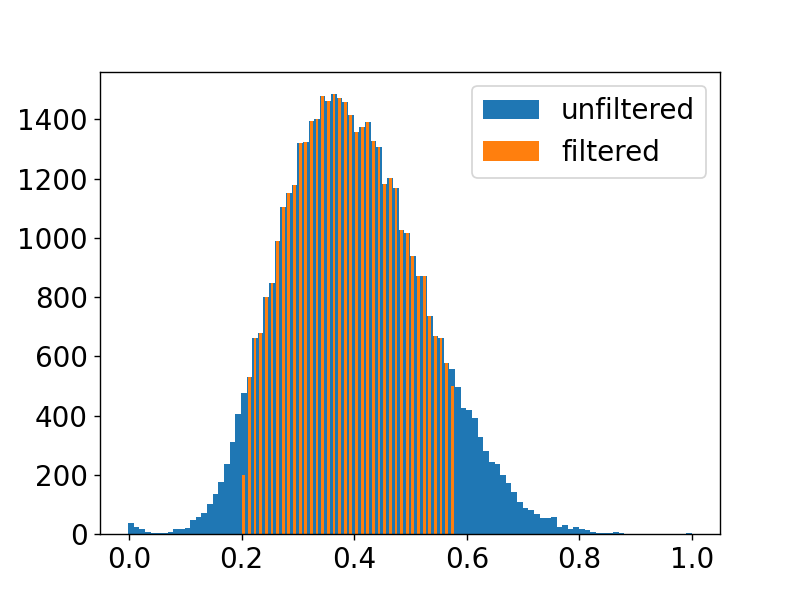

<IPython.core.display.Javascript object>


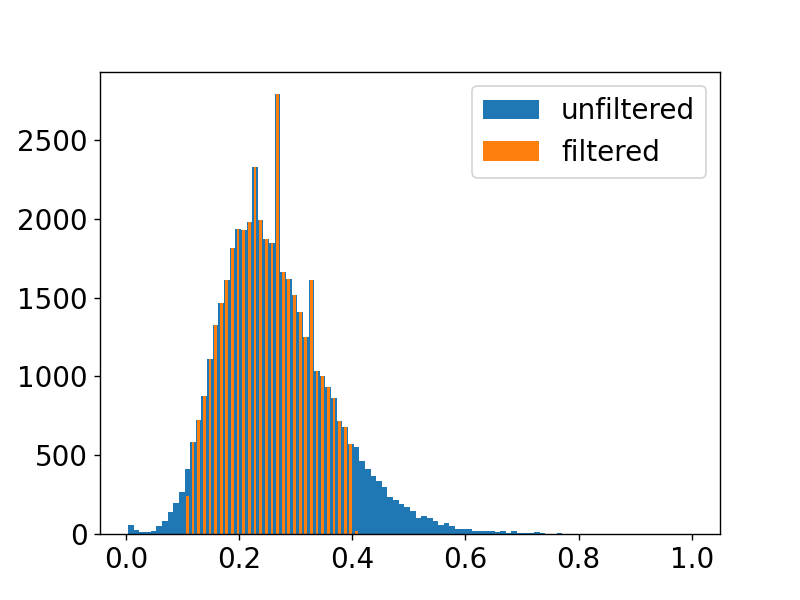

<IPython.core.display.Javascript object>


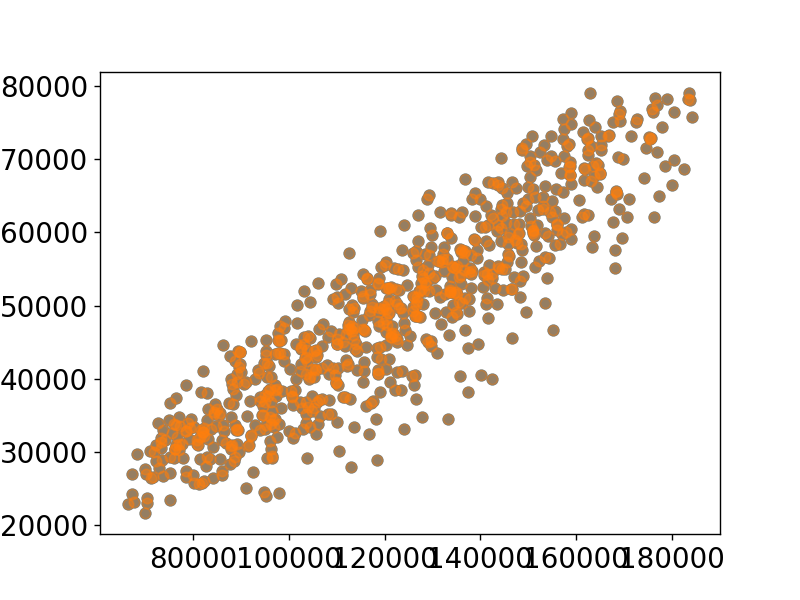

/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated.

In [71]:
plt.close('all')
scans_to_plot = [0]#,1,2]
n_bins = 50
scan_type = 'mono'


if scan_type is 'time':
    start_bin = 0.0015
    stop_bin = 0.0025
    
if scan_type is 'mono':
    start_bin = 394.5
    stop_bin = 402.4
    
# plt.figure()
unpumped_spectrum = np.zeros(n_bins-1)
to_average = []
fim0_channels = [4,5,6,7]#,5,6,7]#,5,6,7]#,5,6,7]#,5,6,7]
fim1_channels = [5,6]
for scan in scans_to_plot:
    all_events = raw_datas[scan].events 
    pumped_events = all_events[raw_datas[scan].laser==1]
    unpumped_events = all_events[raw_datas[scan].laser==0]
    if scan_type is 'time':
        x_axis = raw_datas[scan].lxt

    if scan_type is 'mono':
        
        x_axis = raw_datas[scan].mono_encoder_ev
    andor = raw_datas[scan].andor_dir_intensities
    
    
    fim_0 = np.sum(raw_datas[scan].I0_intensities_fim0[fim0_channels,:],0)
    fim_1 = np.sum(raw_datas[scan].I0_intensities_fim1[fim1_channels,:],0)
    
    all_Izero = fim_0
#     all_Izero = fim_1
#     all_Izero = np.sum(np.array((fim_0,fim_1)),0)
    
#     fim_0 = raw_datas[scan].I0_intensities_fim1[7,:]


    B_condition_1 = bounds_filter(all_Izero/np.max(all_Izero)\
                                        ,[[0.05,'None'],[1.5]],True) 
    B_condition_2 = bounds_filter(andor/np.max(andor)\
                                        ,[[0.05,'None'],[1.5]],True) 
    bounds_conditions = B_condition_1 & B_condition_2
    

    x_value = x_axis[np.logical_and(bounds_conditions,np.logical_and(x_axis>start_bin,x_axis<stop_bin))]
    y_value = all_Izero[np.logical_and(bounds_conditions,np.logical_and(x_axis>start_bin,x_axis<stop_bin))]
    bins, Izero_binned_means, Izero_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = andor[np.logical_and(bounds_conditions,np.logical_and(x_axis>start_bin,x_axis<stop_bin))]
    bins, andor_binned_means, andor_binned_shots = energy_binning(x_value,y_value,n_bins)

    y_value = all_events[np.logical_and(bounds_conditions,np.logical_and(x_axis>start_bin,x_axis<stop_bin))]
    bins, trash, events_binned = energy_binning(x_value,y_value,n_bins)
    
    lin_conditions = []
    plot = False
    for i in range(0,n_bins-1):
            if i is 2:
                plot = True
                
            lin_conditions.append(lin_filter(Izero_binned_shots[i],andor_binned_shots[i]\
                                        ,[1,True],plot))
            
            plot = False
    lin_conditions = np.asarray(lin_conditions)

    andor_filt_and_binned = np.asarray([andor_shots[lin_cond] \
                                        for andor_shots,lin_cond in zip(andor_binned_shots,lin_conditions)],dtype=object)
    Izero_filt_and_binned = np.asarray([Izero_shots[lin_cond] \
                                        for Izero_shots,lin_cond in zip(Izero_binned_shots,lin_conditions)],dtype=object)

    
    events_filt_and_binned = np.asarray([events_binned[lin_cond] \
                                        for events_binned,lin_cond in zip(events_binned,lin_conditions)],dtype=object)
    andor_filt_and_binned_means = np.asarray([np.mean(x) for x in andor_filt_and_binned])
    izero_filt_and_binned_means = np.asarray([np.mean(x) for x in Izero_filt_and_binned])

    norm_then_mean = np.asarray([np.mean(x) for x in andor_filt_and_binned/Izero_filt_and_binned])
    mean_then_norm = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(andor_filt_and_binned,Izero_filt_and_binned)])
    
    
    andor_unpumped = []
    andor_pumped = []
    izero_unpumped = []
    izero_pumped = []
    
    events_pumped = [None] * len(events_filt_and_binned)
    
    events_unpumped = [None] * len(events_filt_and_binned)

    for i in range(0,len(events_filt_and_binned)):
        pumped_condition = [k in pumped_events for k in events_filt_and_binned[i]]
        unpumped_condition = [k in unpumped_events for k in events_filt_and_binned[i]]
        
#         events_filt_and_binned_pumped[i] = events_filt_and_binned[pumped_condition]

        events_pumped[i] = (events_filt_and_binned[i][pumped_condition])
        events_unpumped[i] = (events_filt_and_binned[i][unpumped_condition])
    
        andor_unpumped.append(andor_filt_and_binned[i][unpumped_condition])
        andor_pumped.append(andor_filt_and_binned[i][pumped_condition])

        izero_unpumped.append(Izero_filt_and_binned[i][unpumped_condition])
        izero_pumped.append(Izero_filt_and_binned[i][pumped_condition])
    

    pumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_pumped)/np.asarray(izero_pumped)])
    unpumped_spec = np.asarray([np.mean(x) for x in np.asarray(andor_unpumped)/np.asarray(izero_unpumped)])
    
    
    andor_pumped = np.array(andor_pumped)
    andor_unpumped = np.array(andor_unpumped)
    izero_unpumped = np.array(izero_unpumped)
    izero_pumped = np.array(izero_pumped)
    
    unpumped_spectrum = unpumped_spec
#     pumped_spec = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(np.asarray(andor_pumped),np.asarray(izero_pumped))])
#     unpumped_spec = np.asarray([np.mean(x)/np.mean(y) for x,y in zip(np.asarray(andor_unpumped),np.asarray(izero_unpumped))])

    
    to_average.append([pumped_spec,unpumped_spec])
to_average = np.asarray(to_average)

<IPython.core.display.Javascript object>


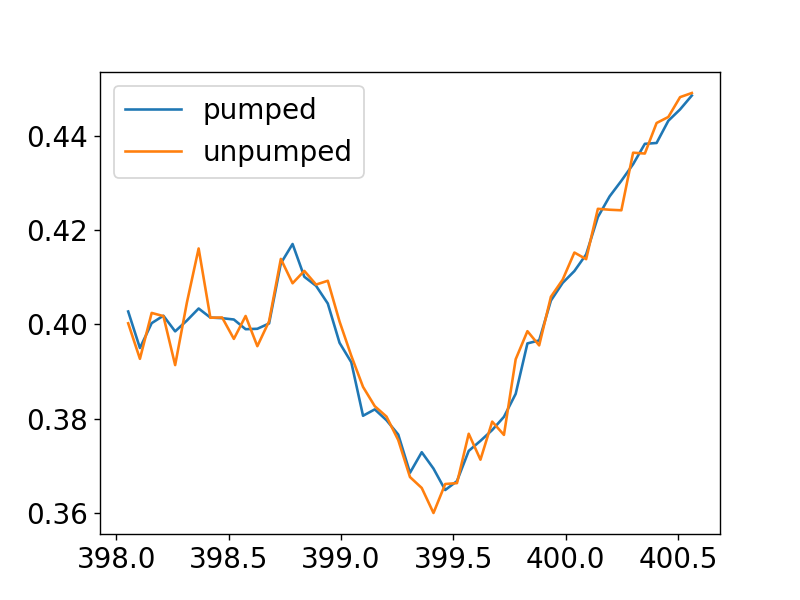

<IPython.core.display.Javascript object>


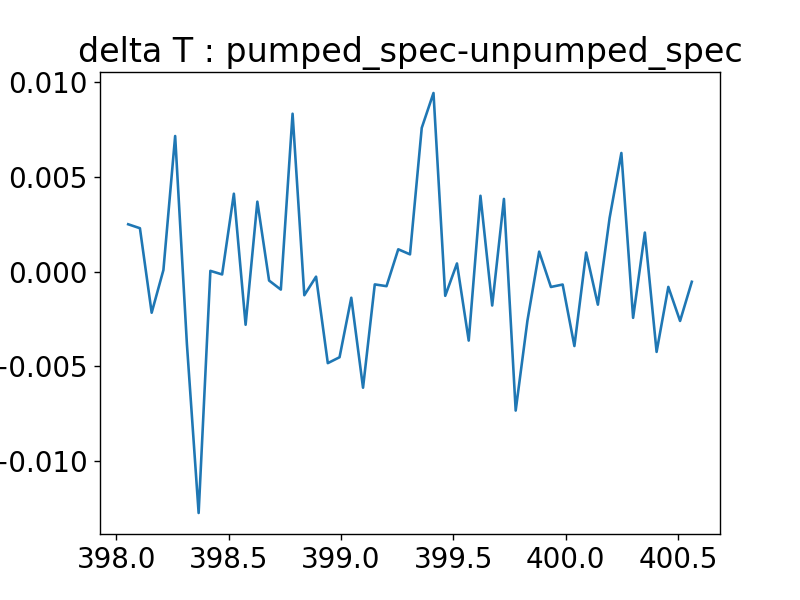

<IPython.core.display.Javascript object>


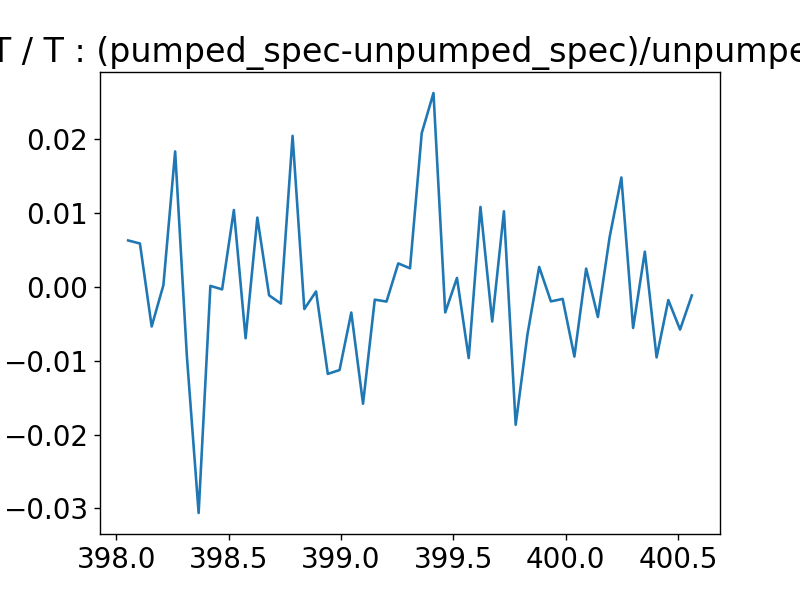

In [72]:
pumped_spec = np.mean(to_average,0)[0,:]
unpumped_spec = np.mean(to_average,0)[1,:]

plt.figure()
plt.plot(bins[0:-1],pumped_spec,label='pumped')
plt.plot(bins[0:-1],unpumped_spec,label='unpumped')
plt.legend()
plt.show()

plt.figure()
plt.plot(bins[0:-1],pumped_spec-unpumped_spec)
plt.title('delta T : pumped_spec-unpumped_spec')
plt.show()

plt.figure()
plt.plot(bins[0:-1],(pumped_spec-unpumped_spec)/unpumped_spec)
plt.title('delta T / T : (pumped_spec-unpumped_spec)/unpumped_spec')
plt.show()

<IPython.core.display.Javascript object>


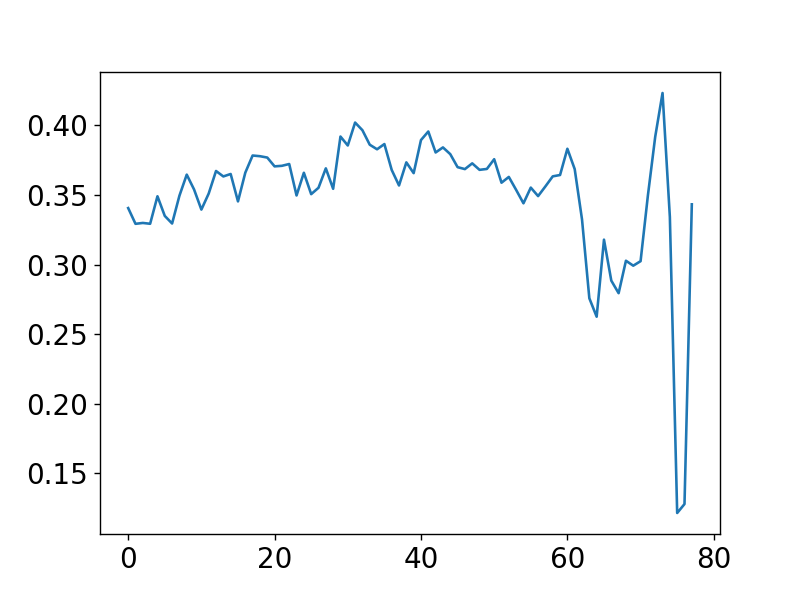

In [83]:
plt.figure()
plt.plot(unpumped_spectrum)

In [25]:
# raw_datas[0].tt_posps.shape

# plt.figure()
# plt.hist(
print(list(raw_datas[0].getKeys()))

['xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laserevent', 'laser', 'tt_pos', 'tt_posps', 'tt_posfwhm', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'events', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir']


TT_analysis

<IPython.core.display.Javascript object>


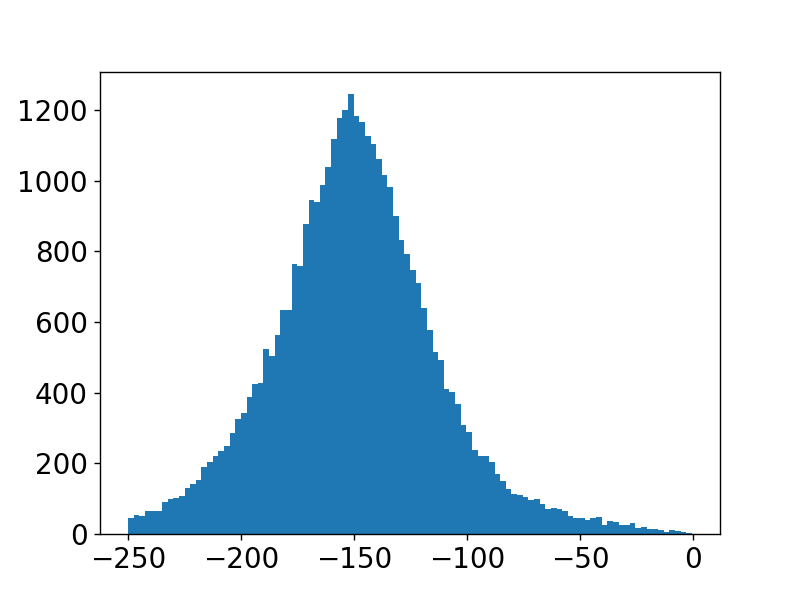

-250
0
5


<IPython.core.display.Javascript object>


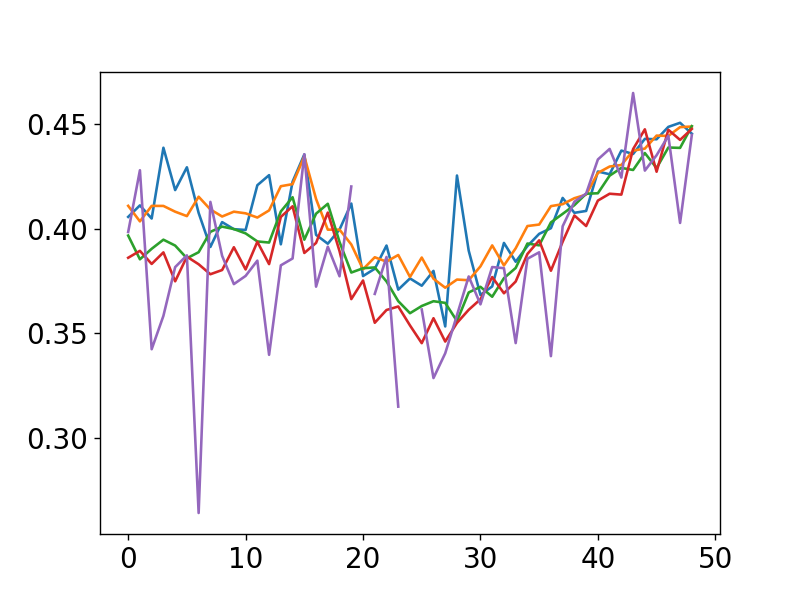

/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [73]:
time_step = 50

# print(raw_datas[0].tt_posps.shape)
# print(events_filt_and_binned[0].shape)
# print(Izero_filt_and_binned[0].shape)

x_values = raw_datas[0].tt_posps

y_values = raw_datas[0].events

cond_peak = (x_values < 0) & (x_values > -250)

plt.figure()
plt.hist(x_values[cond_peak],bins=100)

x_values_pumped = raw_datas[0].tt_posps[raw_datas[scan].laser==1]

y_values_pumped = raw_datas[0].events[raw_datas[scan].laser==1]

x_values_unpumped = raw_datas[0].tt_posps[raw_datas[scan].laser==0]

y_values_unpumped = raw_datas[0].events[raw_datas[scan].laser==0]

# x_values = x_values[cond_peak]
# y_values = y_values[cond_peak]

# events_filt_and_binned = events_filt_and_binned[:,cond_peak]
# andor_filt_and_binned = andor_filt_and_binned[:,cond_peak]
# Izero_filt_and_binned = Izero_filt_and_binned[:,cond_peak]

tt_posps_min = -250
print(tt_posps_min)
tt_posps_max = 0
print(tt_posps_max)

# plt.hist(raw_datas[0].tt_pos,bins=100)

# cond_peak = (raw_datas[0].tt_posps < 100) & (raw_datas[0].tt_posps > -250)

# plt.figure()
# plt.hist(raw_datas[0].tt_posps[cond][:],bins=100)

n_time_bins = round((tt_posps_max - tt_posps_min)/time_step)

print(n_time_bins)

time_bins = [None] * n_time_bins
time_shots = [None] * n_time_bins
# print(time_shots)
for i in range(0,n_time_bins):
    if i < n_time_bins - 1:
        bin_cond = np.logical_and(x_values >= (tt_posps_min + time_step*i), x_values < (tt_posps_min + time_step*(i+1)))
#         print(bin_cond)
        time_bins[i] = x_values[bin_cond]
        time_shots[i] = y_values[bin_cond]
    else:
        bin_cond = x_values >= (tt_posps_min + time_step*(i))
        time_bins[i] = np.array(x_values[bin_cond])
        time_shots[i] = np.array(y_values[bin_cond])

# print(time_shots[1])
time_shots = np.array(time_shots,dtype=object)
time_bins = np.array(time_bins,dtype=object)
# means = {var_to_bin+'_time_binned_mean':time_intensity}
# shots = {var_to_bin+'_time_binned':time_shots}
# binned_vals_time.__dict__.update(means)
# binned_vals_time.__dict__.update(shots)

# print(time_shots[0].shape)
# print(time_bins.shape)
# print(np.squeeze(events_filt_and_binned).shape)

time_andor = [None]* n_time_bins

for i in range (0,n_time_bins):
    time_andor[i] = [None]*(n_bins - 1)

time_events = [None] * n_time_bins

for i in range (0,n_time_bins):
    new_events = []
#     new_andor = []
    for j in range (0,n_bins-1):
        new_events.append(np.intersect1d(time_shots[i],events_filt_and_binned[j]))
        cond = np.asarray([k in time_shots[i] for k in events_filt_and_binned[j]])
        time_andor[i][j] = (andor_filt_and_binned[j]/Izero_filt_and_binned[j])[cond]
    time_events[i] = new_events
#     time_andor[i] = andor_filt_and_binned[cond]

# time_events = np.array(time_events,dtype=object)
# print(time_events.shape)
# print(time_shots[0].shape)
time_events = np.array(time_events, dtype=object)
time_andor = np.array(time_andor, dtype=object)

a = np.zeros(n_bins-1)
plt.figure()
for j in range(n_time_bins):
    for i in range (n_bins - 1):
        a[i] = np.mean(time_andor[j][i])
    plt.plot(a)
    plt.show()

-250
0


<IPython.core.display.Javascript object>


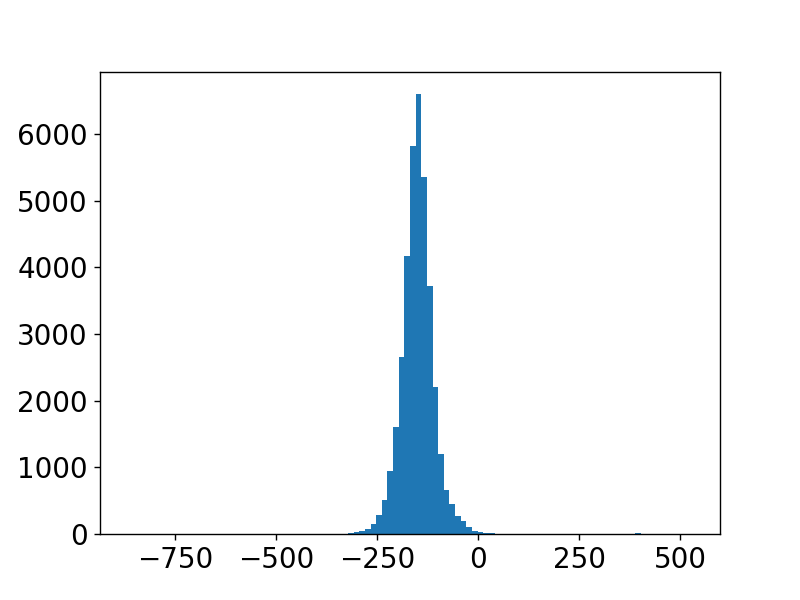

5


<IPython.core.display.Javascript object>


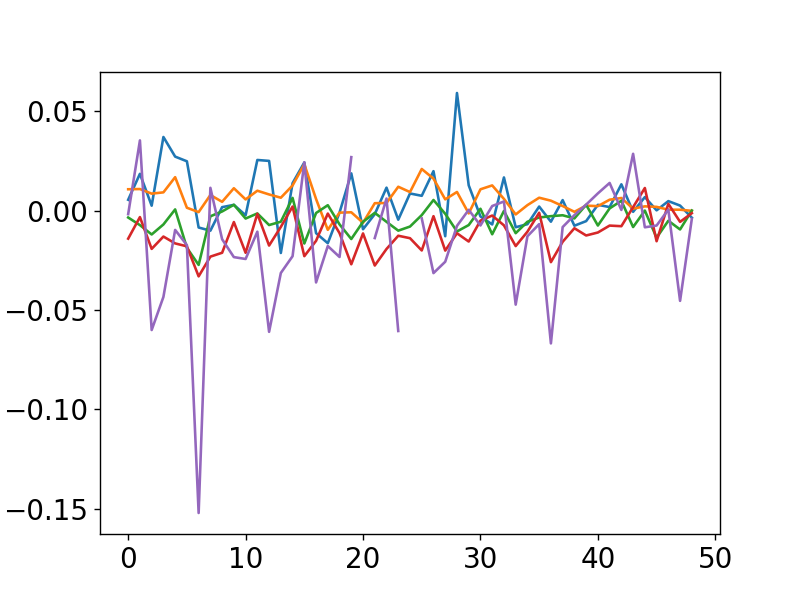

/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [75]:
time_step = 50

# print(raw_datas[0].tt_posps.shape)
# print(events_filt_and_binned[0].shape)
# print(Izero_filt_and_binned[0].shape)

x_values_pumped = raw_datas[0].tt_posps[raw_datas[scan].laser==1]

y_values_pumped = raw_datas[0].events[raw_datas[scan].laser==1]

# x_values_unpumped = raw_datas[0].tt_posps[raw_datas[scan].laser==0]

# y_values_unpumped = raw_datas[0].events[raw_datas[scan].laser==0]

# cond_peak = (raw_datas[0].tt_posps < 100) & (raw_datas[0].tt_posps > -250)

# x_values = x_values[cond_peak]
# y_values = y_values[cond_peak]

# events_filt_and_binned = events_filt_and_binned[:,cond_peak]
# andor_filt_and_binned = andor_filt_and_binned[:,cond_peak]
# Izero_filt_and_binned = Izero_filt_and_binned[:,cond_peak]

tt_posps_min = -250
print(tt_posps_min)
tt_posps_max = 0
print(tt_posps_max)

plt.figure()
plt.hist(raw_datas[0].tt_posps,bins=100)

# cond_peak = (raw_datas[0].tt_posps < 100) & (raw_datas[0].tt_posps > -250)

# plt.figure()
# plt.hist(raw_datas[0].tt_posps[cond][:],bins=100)

n_time_bins = round((tt_posps_max - tt_posps_min)/time_step)

print(n_time_bins)

time_bins_pumped = [None] * n_time_bins
time_shots_pumped = [None] * n_time_bins
# print(time_shots)
for i in range(0,n_time_bins):
    if i < n_time_bins - 1:
        bin_cond_pumped = np.logical_and(x_values_pumped >= (tt_posps_min + time_step*i), x_values_pumped < (tt_posps_min + time_step*(i+1)))
#         print(bin_cond)
        time_bins_pumped[i] = x_values_pumped[bin_cond_pumped]
        time_shots_pumped[i] = y_values_pumped[bin_cond_pumped]
    else:
        bin_cond_pumped = x_values_pumped >= (tt_posps_min + time_step*(i))
        time_bins_pumped[i] = np.array(x_values_pumped[bin_cond_pumped])
        time_shots_pumped[i] = np.array(y_values_pumped[bin_cond_pumped])

# print(time_shots[1])
time_shots_pumped = np.array(time_shots_pumped,dtype=object)
time_bins_pumped = np.array(time_bins_pumped,dtype=object)
# means = {var_to_bin+'_time_binned_mean':time_intensity}
# shots = {var_to_bin+'_time_binned':time_shots}
# binned_vals_time.__dict__.update(means)
# binned_vals_time.__dict__.update(shots)

# print(time_shots[0].shape)
# print(time_bins.shape)
# print(np.squeeze(events_filt_and_binned).shape)

time_andor_pumped = [None]* n_time_bins

for i in range (0,n_time_bins):
    time_andor_pumped[i] = [None]*(n_bins - 1)

time_events_pumped = [None] * n_time_bins

for i in range (0,n_time_bins):
    new_events = []
#     new_andor = []
    for j in range (0,n_bins-1):
        new_events.append(np.intersect1d(time_shots_pumped[i],events_pumped[j]))
        cond = np.asarray([k in time_shots_pumped[i] for k in events_pumped[j]])
        time_andor_pumped[i][j] = (andor_pumped[j]/izero_pumped[j])[cond]
    time_events_pumped[i] = new_events
#     time_andor[i] = andor_filt_and_binned[cond]

# time_events = np.array(time_events,dtype=object)
# print(time_events.shape)
# print(time_shots[0].shape)
time_events_pumped = np.array(time_events_pumped, dtype=object)
time_andor_pumped = np.array(time_andor_pumped, dtype=object)

a = np.zeros(n_bins-1)
plt.figure()
for j in range(n_time_bins):
    for i in range (n_bins - 1):
        a[i] = np.mean(time_andor_pumped[j][i])
    q = a - unpumped_spectrum
    plt.plot(q)
    plt.show()

In [ ]:
plt.close('all')

acceptance = 0.05
fim_chan = 6
y_to_fit = binned_vals.andor_dir_intensities_binned
x_to_fit = binned_vals.I0_intensities_fim1_binned
filter_params = bin_filtering(x_to_fit,y_to_fit,fim_chan,acceptance)

filtered_data = np.asarray([x[y] for x,y in zip(y_to_fit,filter_params)],dtype=object)
plt.figure(10)
plt.scatter(x_to_fit[50][:,6],y_to_fit[50],color='blue',alpha=0.5)
plt.scatter(x_to_fit[50][:,6][filter_params[50]],y_to_fit[50][filter_params[50]],color='red',alpha=0.3)
plt.show()

In [25]:
test_1 = np.arange(0,100)
test_2 = np.int64(np.linspace(0,100,5))

set_1 = set(test_1)
set_2 = set(test_2)
set_2.intersection(set_1)

time_binned[0,i] = time_bin_events[0].intersection(energy_bin_events)



{0, 25, 50, 75}

In [62]:
# events_filt_and_binned[15]

In [119]:
plt.close('all')
## correlation filter between I0 and detector at each energy binx
# plt.figure()
# plt.scatter(np.squeeze(np.sum(raw_datas[0].I0_intensities_fim0[4:7,:],0)),raw_datas[0].andor_dir_intensities,alpha=0.05)
# plt.scatter(np.squeeze(np.sum(raw_datas[0].I0_intensities_fim0[4:7,:],0)),raw_datas[0].andor_dir_intensities,alpha=0.05)
# plt.figure()
# plt.scatter(raw_datas[0].I0_intensities_fim0[5,:],raw_datas[0].andor_dir_intensities,alpha=0.05)
# for i in range(4,8):
# #     plt.figure(10)
#     plt.scatter(binned_vals.I0_intensities_fim1_binned[50][:,i],binned_vals.andor_dir_intensities_binned[50],alpha=0.5)
#     plt.title('fim1')
#     plt.legend(('4','5','6','7'))
    
#     plt.figure(11)
#     plt.scatter(binned_vals.I0_intensities_fim0_binned[50][:,i]**2,binned_vals.andor_dir_intensities_binned[50],alpha=0.5)
#     plt.title('fim0')
#     plt.legend(('4','5','6','7'))
    

# for i in range(0,len(binned_vals.andor_dir_intensities_binned)):
#     if i%10 is 0:
#         plt.scatter(binned_vals.I0_intensities_fim1_binned[i][:,6],binned_vals.andor_dir_intensities_binned[i],alpha=0.5)

NameError: name 'binned_vals' is not defined

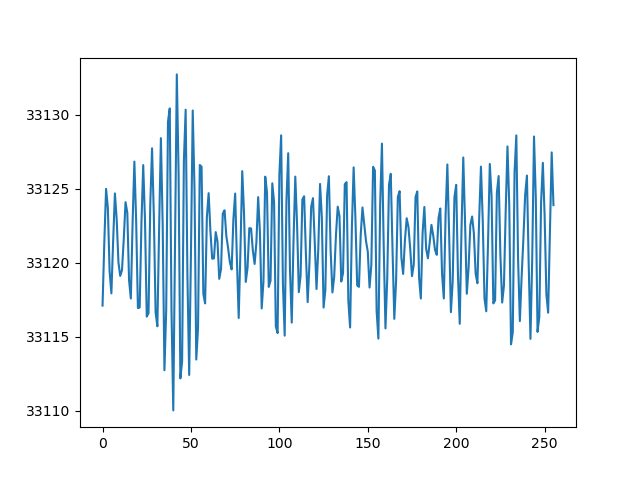

In [32]:
plt.close('all')
mean_waveforms = np.mean(raw_datas[0].fim1_raw,0)
mean_waveforms.shape
plt.figure()
plt.plot(mean_waveforms[6])

Text(0.5, 1.0, 'Mean Waveform Fim1 - Channel 7 - Run 28')

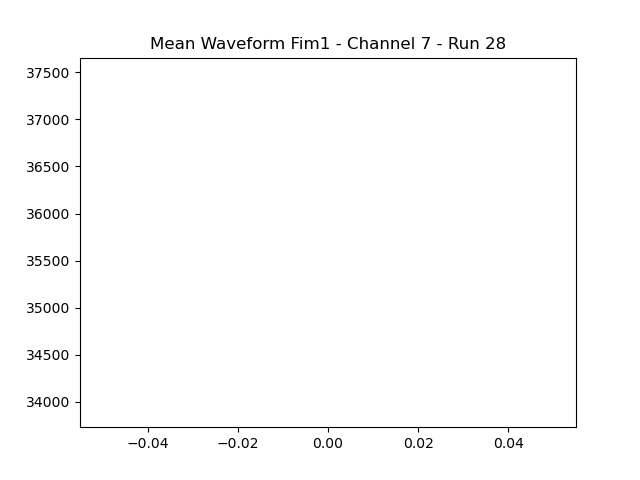

In [5]:
# raw_datas[0].getKeys()
raw_datas[0].I0_specs_fim0[0,:].shape
mean_waveform = np.mean(raw_datas[0].fim0_raw[0,:],0)
mean_waveform.shape

plt.title('Mean Waveform Fim1 - Channel 7 - Run 28')

# plt.figure()
# plt.plot(np.mean(raw_datas[0].andor_dir_raw,0))
# # plt.plot(np.mean(raw_datas[1].andor_dir_raw,0))

# plt.title('Mean Waveform Andor')

# # # raw_datas[0].andor_dir_raw.shape

In [ ]:
 bins, andor_binned_means, andor_binned_shots = energy_binning(raw_datas[0].tt_pos_ps,y_value,n_bins)

(36811, 2048)

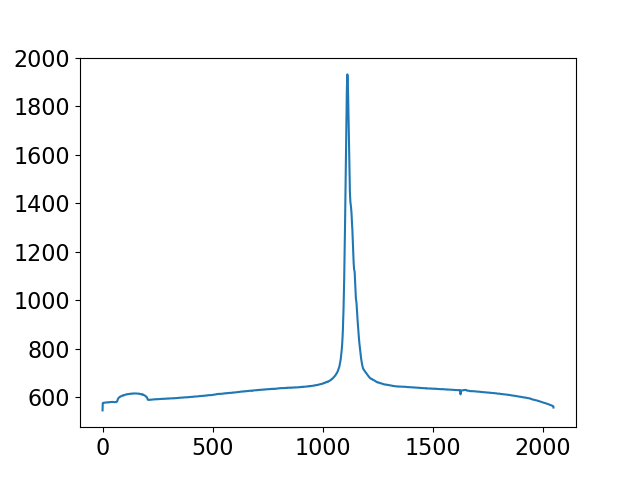

In [115]:
plt.close('all')
plt.figure()
plt.plot(np.mean(raw_datas[0].andor_dir_raw,0))
# # plt.plot(np.mean(raw_datas[0].andor_dir_specs-raw_datas[0].baseline_andor_dir[:,np.newaxis],0))
# # np.sum(np.mean(raw_datas[0].andor_dir_specs-raw_datas[0].baseline_andor_dir[:,np.newaxis],0))
# # raw_datas[0].andor_dir_specs.shape
# # raw_datas[0].andor_dir_raw.shape

# plt.close('all')
# plt.figure()
# plt.scatter(raw_datas[0].I0_intensities_fim1[x,:],raw_datas[0].I0_intensities_fim1[y,:],alpha =0.1)
raw_datas[0].andor_dir_raw.shape

In [11]:
plt.close('all')
bounds_params = []
acceptance = 0.12
for raw in raw_datas:
    bounds_param = PDC()
    
    B_condition_1 = bounds_filter(raw.I0_intensities_fim1[4,:],[[13000,'None'],[3]],False) 
    B_condition_2 = bounds_filter(raw.I0_intensities_fim1[5,:],[[5000,'None'],[3]],False) 
    B_condition_3 = bounds_filter(raw.I0_intensities_fim1[6,:],[[6500,'None'],[2]],False) 
    B_condition_4 = bounds_filter(raw.I0_intensities_fim1[7,:],[[10000,'None'],[5]],False) 

    # raw.I0_intensities_fim0[4,:] is I0 intensities from fim0 channel 4


    bounds_condition = B_condition_1 & B_condition_2 & B_condition_3 & B_condition_4

    L_condition_1 = lin_filter(raw.I0_intensities_fim1[4,:], raw.andor_dir_intensities,[0.1,True],False)
    L_condition_2 = lin_filter(raw.I0_intensities_fim1[5,:], raw.andor_dir_intensities,[0.1,True],False)
    L_condition_3 = lin_filter(raw.I0_intensities_fim1[6,:], raw.andor_dir_intensities,[0.1,True],False)
    L_condition_4 = lin_filter(raw.I0_intensities_fim1[7,:], raw.andor_dir_intensities,[0.1,True],False)

#     y = raw.andor_dir_intensities
#     x = raw.I0_intensities_fim1[6,:]
#     scale = np.max([x,y])
#     poly_fit = np.polyfit(x, y,2)
#     cond_poly_high = y < (x**2) * poly_fit[0] + x*poly_fit[1]+poly_fit[2] + acceptance*scale
#     cond_poly_low = y > (x**2) * poly_fit[0] + x*poly_fit[1]+poly_fit[2] - acceptance*scale
#     L_condition_1 = cond_poly_high & cond_poly_low
    linearity_condition = L_condition_4

#     plt.figure()
#     plt.scatter(x,y,alpha=0.95)
#     plt.scatter(x[L_condition_1],y[L_condition_1],alpha=0.05)
#     plt.show()
    condition = bounds_condition & linearity_condition
    
    bounds_param.changeValue(condition=condition)
    bounds_params = bounds_params + [bounds_param]
    


In [ ]:
vars_to_bin = ['I0_intensities_fim0','I0_intensities_fim1','intensities_fim2','andor_dir_intensities']
scan = 0
nan_cond = np.logical_not(np.isnan(np.squeeze(raw_datas[scan].mono_encoder)))
binned_vals = PDC()
n_bins = 100
for var_to_bin in vars_to_bin:
    x_value = np.squeeze(raw_datas[scan].mono_encoder)[nan_cond]
    y_value = np.transpose(getattr(raw_datas[scan],var_to_bin))[nan_cond]
    bins, mean_val, shot_by_shot = energy_binning(x_value,y_value,n_bins)
    means = {var_to_bin+'_binned_mean':mean_val}
    shots = {var_to_bin+'_binned':shot_by_shot}
    binned_vals.__dict__.update(means)
    binned_vals.__dict__.update(shots)

binned_vals.getKeys()

In [ ]:
plt.close('all')

acceptance = 0.05
fim_chan = 6
y_to_fit = binned_vals.andor_dir_intensities_binned
x_to_fit = binned_vals.I0_intensities_fim1_binned
filter_params = bin_filtering(x_to_fit,y_to_fit,fim_chan,acceptance)

# filtered_data = np.asarray([x[y] for x,y in zip(y_to_fit,filter_params)],dtype=object)
# plt.figure(10)
# plt.scatter(x_to_fit[50][:,6],y_to_fit[50],color='blue',alpha=0.5)
# plt.scatter(x_to_fit[50][:,6][filter_params[50]],y_to_fit[50][filter_params[50]],color='red',alpha=0.3)
# plt.show()

In [ ]:
# # plt.figure()
# plt.plot(np.mean(raw_datas[0].fim1_raw[:,7,:],0))
# # plt.show()
# raw_datas[0].fim1_raw[:,4,:].shape
# plt.legend(('4','5','6','7'))
# plt.show()

plt.figure()
for i in range(4,8):
    plt.plot(-np.mean(raw_datas[0].I0_specs_fim1[i,:]-raw_datas[0].baselines_fim1[i,:,np.newaxis],0))
plt.legend(('4','5','6','7'))
plt.show()

# plt.figure()
# plt.scatter(raw_datas[0].andor_dir_intensities,raw_datas[0].I0_intensities_fim1[4,:],alpha=0.01)
# raw_datas[0].I0_specs_fim0[i,:].shape
# raw_datas[0].baselines_fim0[i,:,np.newaxis].shape

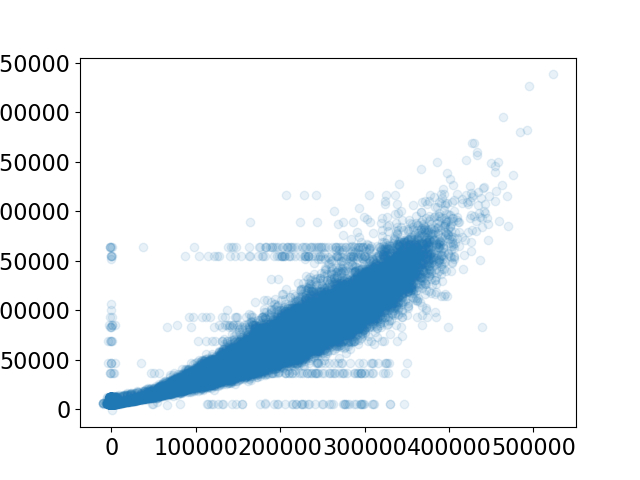

In [125]:
all_fims = np.sum(raw_datas[0].I0_intensities_fim1[[4,6,7],:],0)
plt.figure()
plt.scatter(all_fims,raw_datas[0].andor_dir_intensities,alpha=0.1)

# raw_datas[0].I0_intensities_fim1[4,:].shape

In [5]:
scan_type = 'mono'
# scan_type = 'time'

pro_datas = []
for i in range(0,len(raw_datas)):
    pro_data = PDC()
    pumped = raw_datas[i].laser==1
    unpumped = raw_datas[i].laser==0
    condition = bounds_params[i].condition
    all_fims = np.sum(raw_datas[i].I0_intensities_fim1[[4,6,7],:],0)

#     norm_by = all_fims
    norm_by = raw_datas[i].I0_intensities_fim1[7,:]

    
    if scan_type is 'mono':

        n_bins = 100
#         mono_encoder_ev = np.squeeze(mono_calib(raw_datas[i].energy_raw,raw_datas[i].mono_encoder))
        
        x_vals = np.squeeze(raw_datas[i].mono_encoder)#mono_encoder_ev
#         x_vals = mono_encoder_ev

        y_vals = raw_datas[i].andor_dir_intensities
#         y_vals = raw_datas[i].intensities_fim2[0,:]
#         y_vals = np.sum(raw_datas[i].andor_dir_specs,1)
#         y_vals = norm_by
        
        ##### pumped #####
        energy,intensity_raw_pumped = \
        mono_spectrum(x_vals[pumped],n_bins,y_vals[pumped])
        
        energy,intensity_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped])
        
        energy,intensity_norm_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped]/norm_by[condition&pumped])
        
        ##### unpumped #####
        energy,intensity_raw_unpumped = \
        mono_spectrum(x_vals[unpumped],n_bins,y_vals[unpumped])
        
        energy,intensity_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped])
        
        energy,intensity_norm_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped]/norm_by[condition&unpumped])

        
        pro_data.changeValue(energy=energy,
                             intensity_raw_pumped = intensity_raw_pumped,
                             intensity_filtered_pumped = intensity_filtered_pumped,
                             intensity_norm_filtered_pumped = intensity_norm_filtered_pumped,
                             intensity_raw_unpumped = intensity_raw_unpumped,
                             intensity_filtered_unpumped = intensity_filtered_unpumped,
                             intensity_norm_filtered_unpumped = intensity_norm_filtered_unpumped)
        
        pro_datas = pro_datas + [pro_data]

        

/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/Functions.py:82: RuntimeWarning: Mean of empty slice
  intensity[i] = np.nanmean(y_vals[binning])


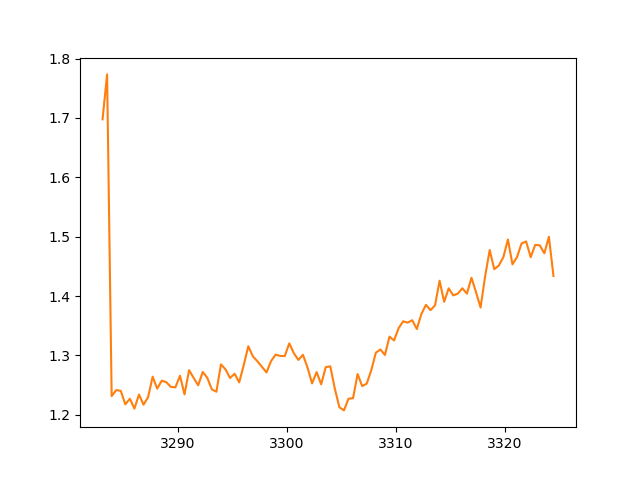

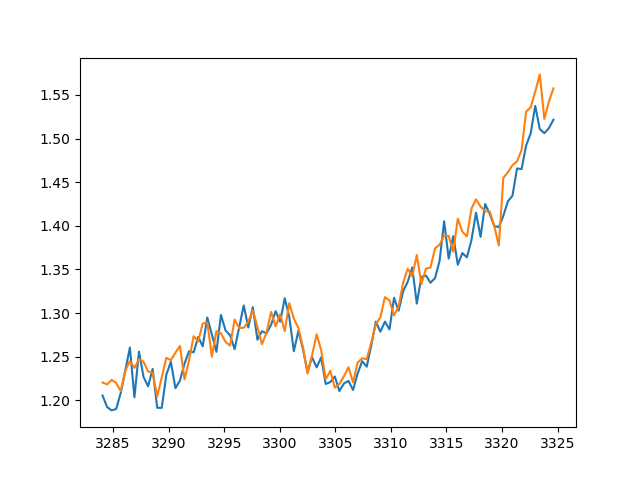

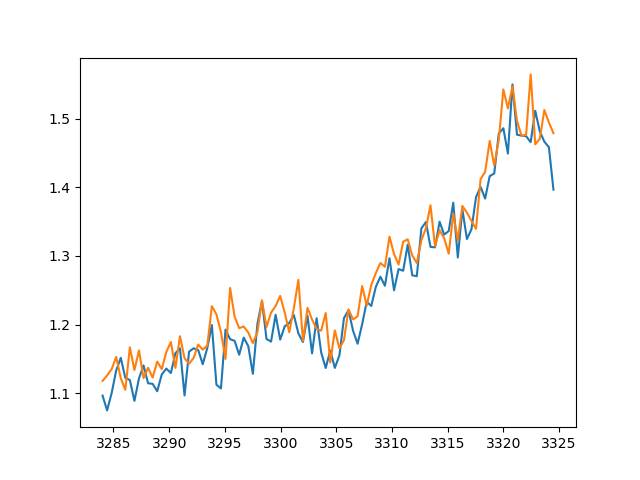

In [6]:
plt.close('all')
for i in range(0,len(scans)):
    plt.figure()
    plt.plot(pro_datas[i].energy,pro_datas[i].intensity_norm_filtered_pumped)
    plt.plot(pro_datas[i].energy,pro_datas[i].intensity_norm_filtered_unpumped)
    plt.show()


# # plt.figure()
# # plt.plot(pro_datas[1].energy,pro_datas[1].intensity_raw_pumped)
# # plt.plot(pro_datas[1].energy,pro_datas[1].intensity_filtered_pumped)
# # plt.show()

# plt.figure(10)
# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_raw_pumped)#/np.max(pro_datas[0].intensity_raw_pumped))
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_norm_filtered_pumped/np.max(pro_datas[0].intensity_norm_filtered_pumped))

# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped)#/np.max(pro_datas[0].intensity_norm_filtered_pumped))
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_raw_pumped/np.max(pro_datas[0].intensity_raw_pumped))
# plt.legend(('4','5','6','7'))
# plt.show()


# plt.figure(11)
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_raw_pumped/np.max(pro_datas[0].intensity_raw_pumped))
# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped)
# plt.legend(('4','5','6','7'))
# plt.show()

# plt.figure(11)
# plt.plot(np.mean(raw_datas[0].fim1_raw[:,7,:],0))
# # plt.show()
# # raw_datas[0].fim1_raw[:,5,:].shape
# plt.legend(('4','5','6','7'))
# plt.show()
# raw_datas[i].mono_encoder.shape

In [ ]:
# mono_encoder_ev = np.squeeze(mono_calib(raw_datas[1].energy_raw,raw_datas[1].mono_encoder))


energy,intensity_raw = \
mono_spectrum(raw_datas[1].mono_encoder,n_bins,raw_datas[1].mono_encoder)

# plt.figure()
# plt.plot(raw_datas[1].mono_encoder)#,raw_datas[1].andor_dir_intensities)
n_bins = 10
bins = np.linspace(np.min(raw_datas[1].mono_encoder),np.max(raw_datas[1].mono_encoder),n_bins)

print(bins)
print(np.min(raw_datas[1].mono_encoder))
print(np.max(raw_datas[1].mono_encoder))
test = np.squeeze(raw_datas[1].mono_encoder)
intensity=[]
lower_bound = bins[0]
for i in range(0,len(bins)-1):
    bin_cond = np.logical_and(test>bins[i],test<bins[i+1])
    intensity.append(np.sum(raw_datas[1].andor_dir_intensities[bin_cond]))
intensity = np.asarray(intensity)

In [ ]:
# plt.figure()
# plt.scatter(np.square(raw_datas[0].I0_intensities_fim1[5,:]), raw_datas[0].andor_dir_intensities,alpha=0.1)
# np.squeeze(raw_datas[1].mono_encoder).shape

# test = np.squeeze(raw_datas[1].mono_encoder)
# print(test.shape)
# print(test[np.logical_and(test<bins[1],test>bins[0])].shape)

y_value = raw_datas[0].andor_dir_intensities

n_bins = 50
vernier_energy = np.squeeze(raw_datas[1].mono_encoder)
bins = np.linspace(np.min(vernier_energy),np.max(vernier_energy),n_bins)


intensity=[]
for i in range(0,len(bins)-1):
    bin_cond = np.logical_and(vernier_energy>=bins[i],vernier_energy<=bins[i+1])
    intensity.append(np.sum(y_value[bin_cond]))
intensity = np.asarray(intensity)
plt.figure()
plt.plot(intensity)

In [69]:
scans

[44, 45, 46, 47, 48, 49, 50]

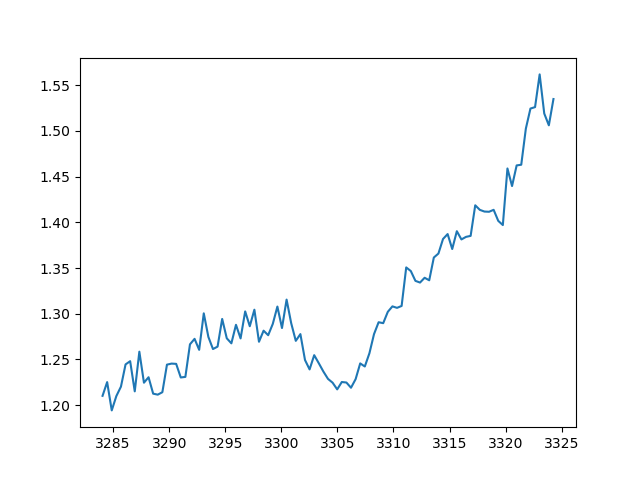

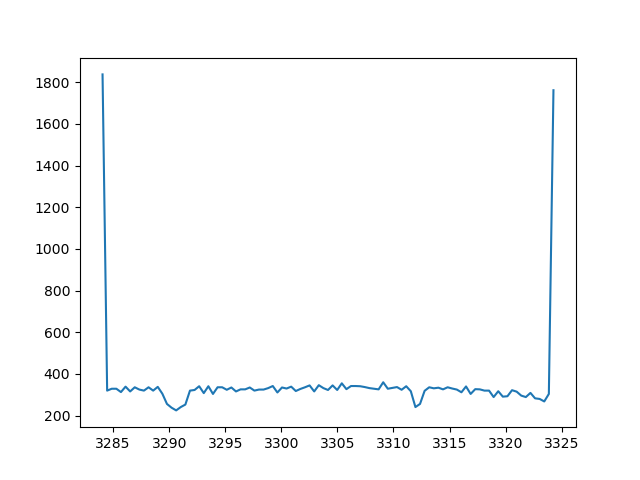

In [35]:
plt.close('all')
# scan = 4
for scan in [1]:
    data = raw_datas[scan]
    cond = bounds_params[scan].condition
    norm_by = raw_datas[scan].I0_intensities_fim1[7,:]
    all_fims = np.sum(raw_datas[scan].I0_intensities_fim1[[4,6,7],:],0)

    y_value = data.andor_dir_intensities[cond]/norm_by[cond]
#     y_value = norm_by**2

    # y_value = np.mean(data.I0_intensities_fim0[4:7,:],0)
    x_value = data.mono_encoder[cond]
    n_bins = 100
    bins,intensity,shots = energy_binning(x_value,y_value,n_bins)
    shots_per_bin = np.asarray([i.shape[0] for i in shots])

    plt.figure(15)
    plt.plot(bins[0:-1],intensity)#/np.max(intensity))
    plt.show()
    plt.figure(16)
    # _, bins, _ = plt.hist(shots)#, 100, label='unfiltered')
    plt.plot(bins[0:-1],shots_per_bin)
    plt.show()

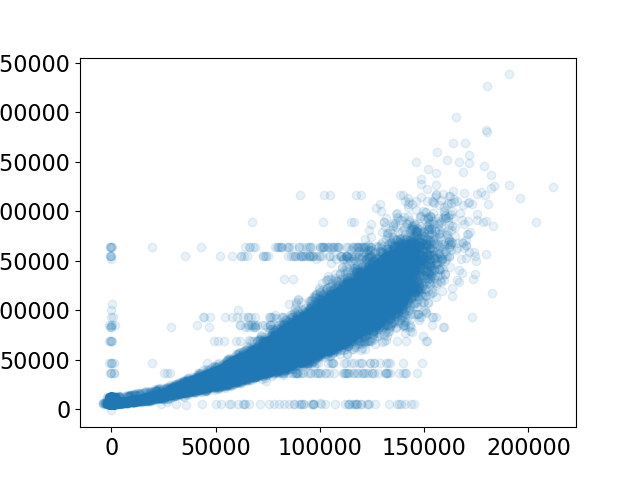

In [129]:
scan = 0
plt.figure()
plt.scatter(raw_datas[scan].I0_intensities_fim1[6,:],raw_datas[scan].andor_dir_intensities,alpha=0.1)

In [26]:
raw_datas[0].mono_encoder[np.isnan(raw_datas[0].mono_encoder)]

array([nan, nan])

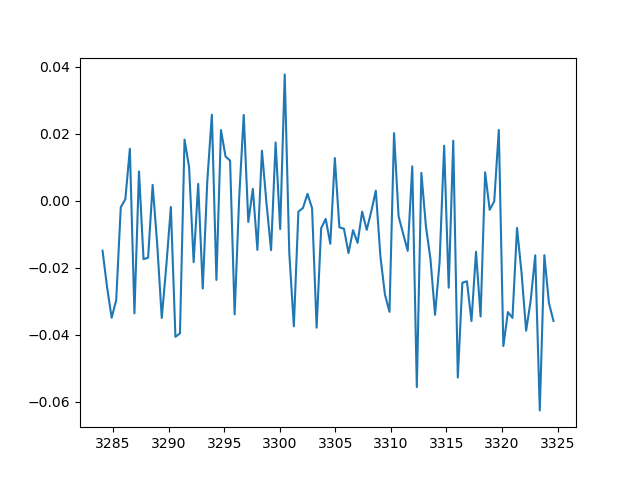

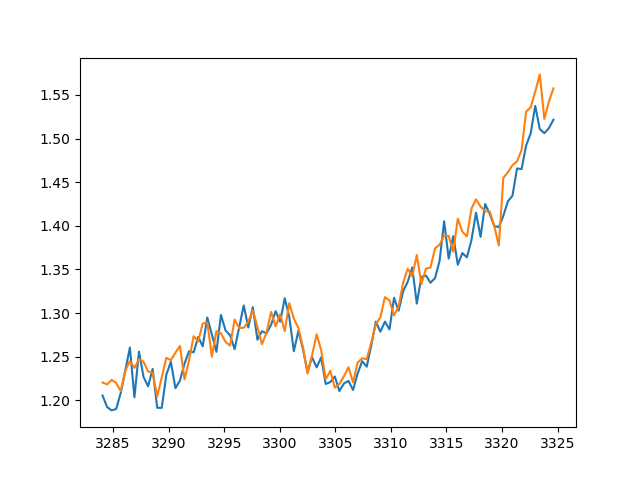

In [10]:
plt.figure()
plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped-pro_datas[1].intensity_norm_filtered_unpumped)
# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_unpumped)
plt.show()

plt.figure()
plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped)
plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_unpumped)
plt.show()